In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [34]:
pwd

'C:\\Users\\Owner'

In [35]:
df = pd.read_csv(r"C:\\Users\\Owner\Desktop\AMZN.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/8/2008,76.779999,81.209999,76.290001,80.510002,80.510002,9162700
1,8/11/2008,80.180000,91.750000,79.779999,88.089996,88.089996,25070200
2,8/12/2008,87.320000,88.480003,86.099998,87.250000,87.250000,8026500
3,8/13/2008,86.279999,88.250000,84.540001,86.690002,86.690002,7208800
4,8/14/2008,85.709999,88.750000,85.220001,88.029999,88.029999,6901700
...,...,...,...,...,...,...,...
1984,6/27/2016,692.010010,696.820007,682.119995,691.359985,691.359985,5568000
1985,6/28/2016,700.000000,708.000000,698.169983,707.950012,707.950012,4037000
1986,6/29/2016,715.750000,719.500000,713.539978,715.599976,715.599976,3070100
1987,6/30/2016,717.200012,719.369995,712.539978,715.619995,715.619995,2855100


In [36]:
df_d = df.reset_index()['Adj Close']
df_d

0        80.510002
1        88.089996
2        87.250000
3        86.690002
4        88.029999
           ...    
1984    691.359985
1985    707.950012
1986    715.599976
1987    715.619995
1988    725.679993
Name: Adj Close, Length: 1989, dtype: float64

In [37]:
predict_days = int(input("Enter the number of future price Days: "))
df_d1 = df_d.shift(-predict_days)
df_d1.tail()

Enter the number of future price Days: 30


1984   NaN
1985   NaN
1986   NaN
1987   NaN
1988   NaN
Name: Adj Close, dtype: float64

In [39]:
x = np.array(df_d)
x = x[:-predict_days]
print(x)

[ 80.510002  88.089996  87.25     ... 695.27002  697.450012 698.52002 ]


In [53]:
len(x)

1959

In [40]:
y = np.array(df_d1)
y = y[:-predict_days]
print(y)

[ 74.93      71.760002  69.959999 ... 715.599976 715.619995 725.679993]


In [54]:
len(y)

1959

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(np.array(x).reshape(-1,1))
x.shape

(1959, 1)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
y.shape

(1959, 1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [44]:
svr_linear = SVR(kernel = 'linear', C = 1e3, gamma = 0.1)
svr_linear.fit(x_train, y_train)

svr_poly = SVR(kernel = 'poly', C = 1e3, gamma = 0.1)
svr_poly.fit(x_train, y_train)

svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
svr_rbf.fit(x_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
svm_confidence_linear = svr_linear.score(x_test, y_test)
print("SVM Confidence with Linear: ", svm_confidence_linear)

svm_confidence_poly = svr_poly.score(x_test, y_test)
print("SVM Confidence with Polynomial: ", svm_confidence_poly)

svm_confidence_rbf = svr_rbf.score(x_test, y_test)
print("SVM Confidence with Rbf: ", svm_confidence_rbf)

SVM Confidence with Linear:  0.9567753442090436
SVM Confidence with Polynomial:  0.7072353937250698
SVM Confidence with Rbf:  0.9543233830365968


In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
lr_score = lr.score(x_test, y_test)
print("Linear Regression with Confidence Score: ", lr_score)

tree_score = tree.score(x_test, y_test)
print("Decision Tree with Confidence Score: ", tree_score)

Linear Regression with Confidence Score:  0.9618274150249507
Decision Tree with Confidence Score:  0.942927417067897


In [61]:
x_predict = np.array(df_d)
x_predict = x_predict[-predict_days:]
scaler = MinMaxScaler(feature_range=(0,1))
x_predict = scaler.fit_transform(np.array(x_predict).reshape(-1,1))
x_predict.shape

(30, 1)

In [62]:
y_predict = np.array(df_d1)
y_predict = y_predict[-predict_days:]
scaler = MinMaxScaler(feature_range=(0,1))
y_predict = scaler.fit_transform(np.array(y_predict).reshape(-1,1))
y_predict.shape

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


(30, 1)

In [63]:
print(x_predict)

[[0.31019527]
 [0.14615006]
 [0.34815687]
 [0.46068299]
 [0.63855707]
 [0.56616058]
 [0.85222312]
 [0.76138864]
 [1.        ]
 [0.92678927]
 [0.95905613]
 [0.87798266]
 [0.95661674]
 [0.98400309]
 [0.71990196]
 [0.64750547]
 [0.75759217]
 [0.62093335]
 [0.70905698]
 [0.40753872]
 [0.61415461]
 [0.66323261]
 [0.52169166]
 [0.83297256]
 [0.20607473]
 [0.        ]
 [0.44983798]
 [0.65726648]
 [0.65780929]
 [0.93058577]]


In [64]:
print(y_predict)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [66]:
lr_prediction = lr.predict(x_predict)
print(lr_prediction)

tree_prediction = tree.predict(x_predict)
print(tree_prediction)

[[0.31867464]
 [0.15244986]
 [0.35714062]
 [0.47116181]
 [0.65139921]
 [0.57804082]
 [0.86790412]
 [0.77586278]
 [1.01764443]
 [0.94346099]
 [0.97615656]
 [0.89400592]
 [0.97368476]
 [1.00143498]
 [0.73382488]
 [0.6604665 ]
 [0.77201586]
 [0.63354133]
 [0.72283581]
 [0.41731144]
 [0.62667252]
 [0.6764026 ]
 [0.53298107]
 [0.84839778]
 [0.21317071]
 [0.00435798]
 [0.46017271]
 [0.6703572 ]
 [0.67090722]
 [0.94730794]]
[0.22954083 0.12947736 0.332814   0.53282558 0.69724903 0.5804302
 0.90490618 0.80721568 0.95776176 0.86210533 0.68096247 0.77116601
 0.68096247 0.9707304  0.69511407 0.69724903 0.93596455 0.67185989
 0.72816318 0.40045586 0.67185989 0.66575787 0.57927612 0.96532079
 0.2253574  0.027452   0.39119458 0.69672973 0.69672973 0.7459067 ]


In [69]:
test_day = np.arange(1, 31)

In [71]:
import matplotlib.pyplot as plt

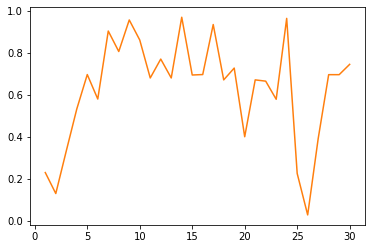

In [72]:
plt.plot(test_day, lr_prediction)
plt.plot(test_day, tree_prediction)